**Q1.**

**[10] Eigenfaces**

a. Partition the provided face data into your training and testing data, e.g. 8 images and 2 other images of each face identity for training and testing respectively. Apply PCA to your training data, by computing the eigenvectors and eigenvalues of the covariance matrix S=(1/N)AAT directly. Show and discuss the results, including: the eigenvectors, the eigenvalues, and the mean image, how many eigenvectors with non-zero eigenvalues are obtained and how many eigenvectors are to be used for face recognition. Give insights and reasons behind your answers.

b. Apply PCA to your training data, using the eigenvectors and eigenvalues of (1/N)ATA.
Show and discuss the results in comparison to the above, including: if the eigenvectors
and eigenvalues obtained are identical, what are the pros/cons of each method. Show
respective measurements for your answers.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import sklearn.model_selection as ms

face_mat = spio.loadmat('/content/drive/MyDrive/face.mat')
print(face_mat.keys())

Mounted at /content/drive
dict_keys(['__header__', '__version__', '__globals__', 'X', 'l'])


X is face data matrix, and l is label for the faces in X

In [4]:
face_data = face_mat['X']
print(face_data)

face_label = face_mat['l']
print(face_label)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 

In [5]:
# Reshape face_label to be a 1D array
face_label = face_label.flatten()
print("Reshaped face_label shape:", face_label.shape)

# Unique identities in the dataset
unique_identities = np.unique(face_label)

# Lists to hold the train and test splits
X_train = []
y_train = []
X_test = []
y_test = []

# Loop over each unique identity
for identity in unique_identities:
    # Get all data and labels where the label matches the current identity
    identity_data = face_data[:, face_label == identity].T
    identity_labels = face_label[face_label == identity]

    # Use train_test_split to split 8 images for training, 2 for testing
    identity_X_train, identity_X_test, identity_y_train, identity_y_test = ms.train_test_split(
        identity_data, identity_labels, train_size=8, test_size=2, random_state=42
    )

    # Append to respective lists
    X_train.append(identity_X_train)
    y_train.append(identity_y_train)
    X_test.append(identity_X_test)
    y_test.append(identity_y_test)

# Concatenate all individual arrays into final train and test datasets
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

# Print the shapes to confirm the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Reshaped face_label shape: (520,)
X_train shape: (416, 2576)
y_train shape: (416,)
X_test shape: (104, 2576)
y_test shape: (104,)


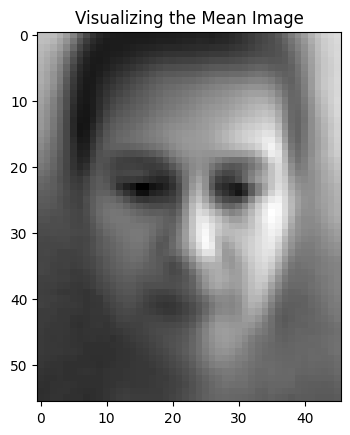

In [37]:
# Mean vector and center the training data
train_mean = np.mean(X_train, axis=0)
data_centered = X_train - train_mean

# Mean image
plt.imshow(train_mean.reshape(46, 56).T, cmap='gray')  # Adjust dimensions if necessary
plt.title("Visualizing the Mean Image")
plt.show()


In [38]:
# Covariance matrix S = (1/N) * A * A^T
cov_matrix = np.dot(data_centered.T, data_centered) / X_train.shape[0]
print("Covariance Matrix Shape:", cov_matrix.shape)

Covariance Matrix Shape: (2576, 2576)


In [35]:
# Eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Eigenvalues and their size
print("Eigenvalues (real parts):", eig_vals.real)
print("Number of Eigenvalues:", len(eig_vals.real))

# Eigenvectors and their size
print("Eigenvectors (real parts):", eig_vecs.real)
print("Eigenvectors Shape:", eig_vecs.shape)

# Sort eigenvalues and eigenvectors
indices_sorted = np.argsort(eig_vals)[::-1]
sorted_eigenvalues = eig_vals[indices_sorted]
sorted_eigenvectors = eig_vecs[:, indices_sorted]

print("First 10 Sorted Eigenvalues:", sorted_eigenvalues[:10].real)


Eigenvalues (real parts): [ 9.50364333e+05  5.08235097e+05  4.21562349e+05 ...  3.14307640e-13
 -2.42084081e-13 -1.52649102e-13]
Number of Eigenvalues: 2576
Eigenvectors (real parts): [[ 1.47299400e-02  1.50694421e-02  1.36832770e-02 ... -5.73433779e-04
   1.90537666e-04 -1.66776267e-04]
 [ 1.66509181e-02  1.40489247e-02  1.43432498e-02 ...  5.49587428e-04
   1.41501367e-04 -3.47581588e-07]
 [ 1.70995798e-02  1.33953344e-02  1.65725449e-02 ...  3.36183080e-04
  -8.99834297e-04 -6.99306040e-04]
 ...
 [-2.30148443e-03 -4.90709943e-02 -8.74754460e-04 ...  1.14341466e-02
  -2.02877296e-02  5.45044138e-03]
 [-1.64270504e-03 -4.86950661e-02 -1.98302554e-03 ... -2.06036538e-04
   2.60286899e-03 -1.47894899e-02]
 [-2.05679902e-03 -4.91266292e-02 -3.74190174e-03 ... -4.66978506e-03
  -2.29934739e-03  2.60951711e-04]]
Eigenvectors Shape: (2576, 2576)
First 10 Sorted Eigenvalues: [950364.3332113  508235.09651687 421562.34944814 240951.88973096
 206484.77459961 147722.231677   131535.23511056 1083

In [43]:
# Choose the top k eigenvectors
selected_k = 300  # k
principal_components = sorted_eigenvectors[:, :selected_k]

[15] Application of Eigenfaces
Use the data partition, which you used in Q1, into training and testing.

a. Perform the face image reconstruction using the PCA bases learnt. Show and discuss the
results, while varying the number of bases to use, including: if the reconstruction error (or
the distortion measure) obtained is same as in the theory, how good the reconstruction results are for at least 3 images of your choice (e.g. from both the training and testing dataset).

Mean Squared Reconstruction Error: 10.379862964219074
Mean Absolute Reconstruction Error: 2.4224823044363357


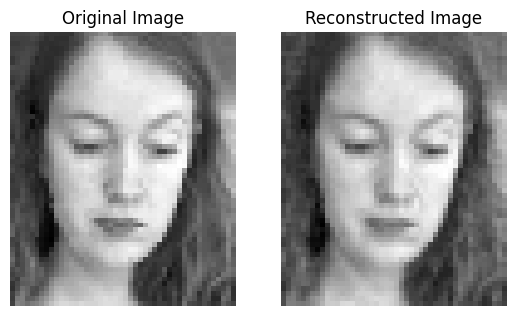

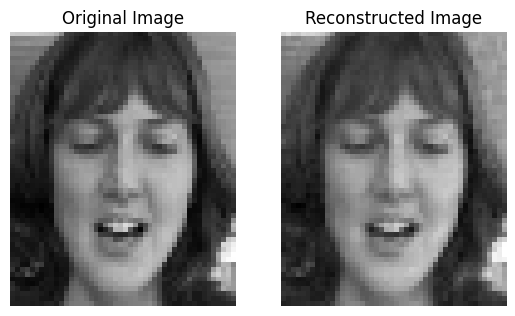

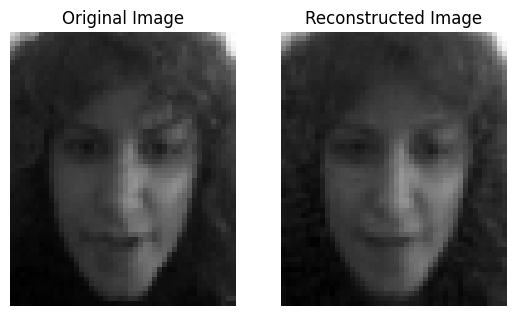

In [50]:
# Project data into reduced dimensions and reconstruct
projected_data = np.dot(data_centered, principal_components)
reconstructed_data = np.dot(projected_data, principal_components.T) + train_mean

# Use real part
reconstructed_data = reconstructed_data.real

# Reconstruction error
mse_reconstruction_error = np.mean(np.square(X_train - reconstructed_data))
print("Mean Squared Reconstruction Error:", mse_reconstruction_error)

mae_reconstruction_error = np.mean(np.abs(X_train - reconstructed_data))
print("Mean Absolute Reconstruction Error:", mae_reconstruction_error)

# Reconstructed images
sample_index = 10  # image index
original_sample = X_train[sample_index].reshape(46, 56).T
reconstructed_sample = reconstructed_data[sample_index].reshape(46, 56).T

plt.subplot(1, 2, 1)
plt.imshow(original_sample, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

# Reconstructed images
sample_index = 20  # image index
original_sample = X_train[sample_index].reshape(46, 56).T
reconstructed_sample = reconstructed_data[sample_index].reshape(46, 56).T

plt.subplot(1, 2, 1)
plt.imshow(original_sample, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

# Reconstructed images
sample_index = 30  # image index
original_sample = X_train[sample_index].reshape(46, 56).T
reconstructed_sample = reconstructed_data[sample_index].reshape(46, 56).T

plt.subplot(1, 2, 1)
plt.imshow(original_sample, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()


b. Perform the PCA-based face recognition by either the NN classification method or alternative method learnt in the PCA lecture. Report and discuss, including: the recognition accuracy (success rates), example success and failure cases, the confusion matrices, time/memory (and any other aspects you observe), by varying the parameter values/experimental settings you used. Give insights and reasons behind your answers.

In [53]:
# Project both training and testing data onto the top k eigenvectors
X_train_pca = np.dot(data_centered, principal_components).real  # Training data projected onto PCA space

# Center the test data using the training mean and project onto PCA components
test_centered = X_test - train_mean
X_test_pca = np.dot(test_centered, principal_components).real  # Test data in PCA space

print("Training Data (PCA space) Shape:", X_train_pca.shape)
print("Testing Data (PCA space) Shape:", X_test_pca.shape)


Training Data (PCA space) Shape: (416, 300)
Testing Data (PCA space) Shape: (104, 300)


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier (for example, with k=1 for nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)

# Train the k-NN classifier on the PCA-transformed training data
knn.fit(X_train_pca, y_train)

# Predict the labels for the PCA-transformed test data
y_pred = knn.predict(X_test_pca)

print("Predicted Labels for Test Data:", y_pred)


Predicted Labels for Test Data: [ 1  1 40  8  3  3  4  3  5  5  6  6  7 33  8  8  9  9 10 10 11 11 12 12
  9 13 14 12 15 15 16  8 17 35 18 18 21  6 20 20 21 21 22 22 23 23 24 42
 25 25 26 26 27 25 28 41 29 29 29 35 31 40 32 32 33 30  5 34 35 40 36 49
 37 37 27 49 39 39 40 40 28 41 16 42 42  7 29 11 45 32 46 46 33  7 29 48
 49 30 50 45 51 51 52 34]


In [55]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Recognition Accuracy:", accuracy)


Recognition Accuracy: 0.6634615384615384


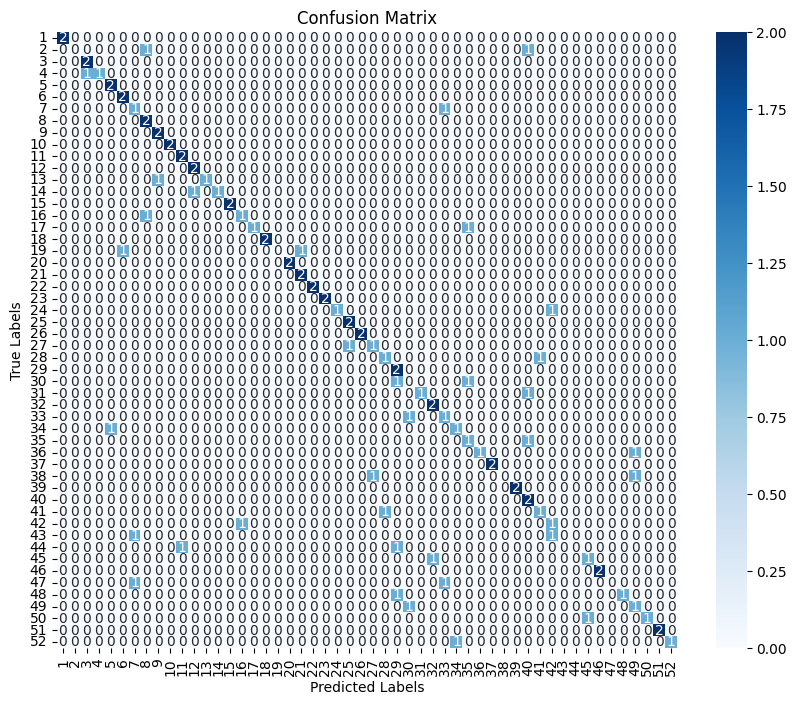

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Example Success Cases:


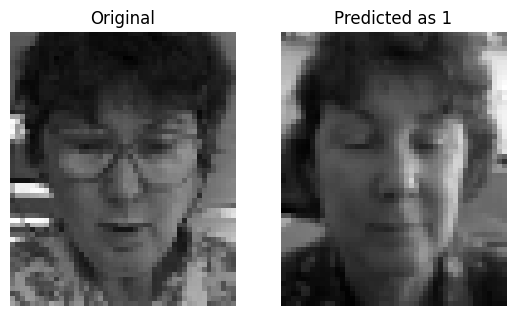

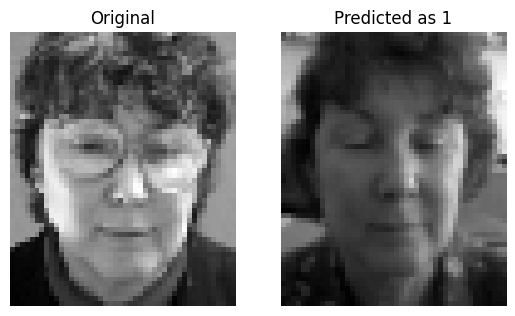

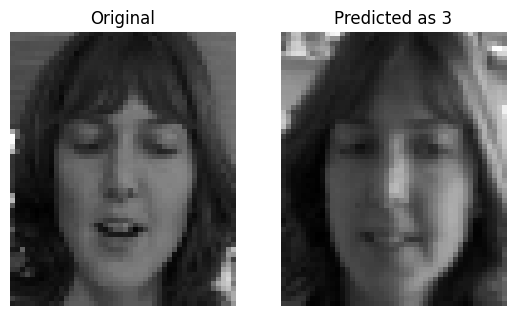

Example Failure Cases:


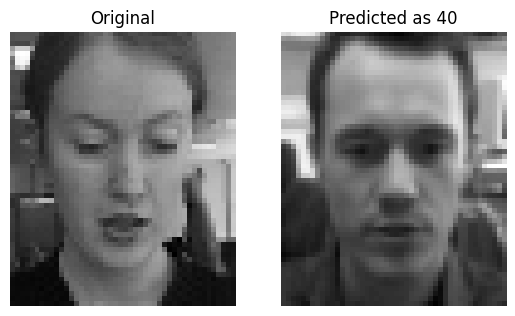

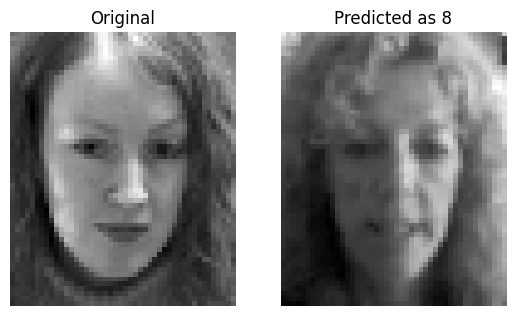

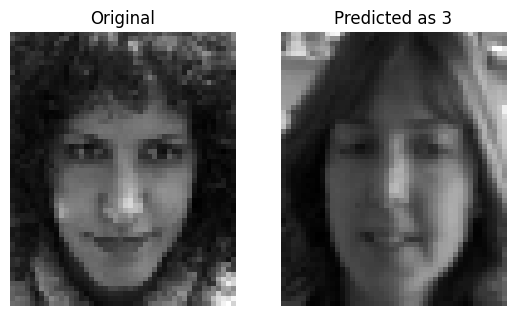

In [57]:
# Identify correctly classified and misclassified indices
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

# Display some success cases
print("Example Success Cases:")
for i in range(min(3, len(correct_indices))):  # Show up to 3 correct examples
    idx = correct_indices[i]
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[idx].reshape(46, 56).T, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(X_train[np.where(y_train == y_pred[idx])[0][0]].reshape(46, 56).T, cmap='gray')
    plt.title(f"Predicted as {y_pred[idx]}")
    plt.axis('off')
    plt.show()

# Display some failure cases
print("Example Failure Cases:")
for i in range(min(3, len(incorrect_indices))):  # Show up to 3 incorrect examples
    idx = incorrect_indices[i]
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[idx].reshape(46, 56).T, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(X_train[np.where(y_train == y_pred[idx])[0][0]].reshape(46, 56).T, cmap='gray')
    plt.title(f"Predicted as {y_pred[idx]}")
    plt.axis('off')
    plt.show()


In [58]:
import time

# Record the start time for the entire classification process
start_time = time.time()

# Run the classification process
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

# Calculate and print elapsed time
end_time = time.time()
print("Elapsed Time for Classification:", end_time - start_time, "seconds")


Elapsed Time for Classification: 0.04796409606933594 seconds
